# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
# pd.set_option('display.max_columns', None)
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
data_path="../../"
import os
import sys

In [14]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [15]:
df=pd.read_csv(data_path+"data/zillow_data.csv")
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [45]:
chicago_df=df[df['Metro'] == 'Chicago']
chicago_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,84545,60511,Big Rock,IL,Chicago,Kane,14258,167200.0,166600.0,165900.0,...,234000,231400,230000,230400,231900,233600,235200,236500,237300,237600
14275,84400,60150,Malta,IL,Chicago,DeKalb,14276,133000.0,132800.0,132500.0,...,125800,126700,128100,129800,131600,133000,134200,135700,138700,141500
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,209100,217300,222500,222200,223200,226400,229300,231500,234500,236800
14499,78853,47948,Goodland,IN,Chicago,Newton,14500,NaN,NaN,NaN,...,91100,90100,90000,89100,85600,82200,80300,79600,81300,83200


In [46]:
chicago_df['ROI_5yrs'] = ((chicago_df['2018-04'] - chicago_df['2013-04'])/chicago_df['2013-04'])*100
chicago_df['ROI_2yrs'] = ((chicago_df['2018-04'] - chicago_df['2016-04'])/chicago_df['2016-04'])*100

C:\Users\jstep\anaconda3\envs\usa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jstep\anaconda3\envs\usa\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
top_30 = chicago_df.sort_values('ROI_5yrs', ascending=False)[:100].sort_values('ROI_2yrs', ascending=False)[:30].RegionName

In [48]:
top_30

383      60085
6496     60436
11235    60163
13647    60034
14316    60180
7863     60633
5234     46324
3654     60099
7853     46394
1392     60505
9411     60162
9023     53181
12716    60165
658      60639
5962     60160
1864     60409
5312     46323
12806    60520
725      60073
13413    47977
3337     60110
5896     60153
948      60804
5948     60403
3180     53140
7558     60447
9120     60155
6124     60164
8952     53168
10187    53104
Name: RegionName, dtype: int64

In [49]:
my_zips=[60085, 60436, 60163, 60034, 60180, 60633, 60099, 60505, 60162,
       60165]

In [69]:
my_regions=chicago_df[chicago_df.RegionName.isin(my_zips)]
my_regions

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs,ROI_2yrs
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,107300,106800,107200,107600,108600,110800,113400,114500,83.493590,45.489199
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,119500,120800,122900,125500,127600,129200,131100,132100,76.368491,24.858223
3654,84354,60099,Zion,IL,Chicago,Lake,3655,108700.0,109200.0,109400.0,...,120000,121100,122100,122700,123100,124700,127000,127900,54.842615,26.508408
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,105000,107000,109200,111200,112700,114100,116100,117700,66.478076,31.655481
7863,84634,60633,Chicago,IL,Chicago,Cook,7864,77900.0,78200.0,78300.0,...,105400,106800,109000,110400,111500,112800,113300,113000,37.637028,26.681614
9411,84411,60162,Hillside,IL,Chicago,Cook,9412,120300.0,120000.0,119700.0,...,168700,169000,169300,170200,171700,172800,173500,173800,48.674080,24.677188
11235,84412,60163,Berkeley,IL,Chicago,Cook,11236,121100.0,120800.0,120500.0,...,168700,170200,172300,174200,175600,177300,179200,180100,54.858126,30.036101
12716,84414,60165,Stone Park,IL,Chicago,Cook,12717,107100.0,106800.0,106500.0,...,149200,149900,150700,152300,154300,155500,155800,156000,63.179916,23.613312
13647,84298,60034,Hebron,IL,Chicago,McHenry,13648,112900.0,112800.0,112800.0,...,167700,168700,170300,172900,175800,177100,177500,178000,36.085627,28.242075
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,222500,222200,223200,226400,229300,231500,234500,236800,41.457587,26.698769


my zips based on group split

# Step 2: Data Preprocessing

Make our data in a form that cna be run ins a model

In [75]:
my_regions=my_regions.T

In [77]:
my_regions

RegionName,60085,60505,60099,60436,60633,60162,60163,60165,60034,60180
RegionID,84340,84541,84354,84487,84634,84411,84412,84414,84298,84426
City,Waukegan,Aurora,Zion,Joliet,Chicago,Hillside,Berkeley,Stone Park,Hebron,Union
State,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL
Metro,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago
CountyName,Lake,Kane,Lake,Will,Cook,Cook,Cook,Cook,McHenry,McHenry
...,...,...,...,...,...,...,...,...,...,...
2018-02,110800,129200,124700,114100,112800,172800,177300,155500,177100,231500
2018-03,113400,131100,127000,116100,113300,173500,179200,155800,177500,234500
2018-04,114500,132100,127900,117700,113000,173800,180100,156000,178000,236800
ROI_5yrs,83.4936,76.3685,54.8426,66.4781,37.637,48.6741,54.8581,63.1799,36.0856,41.4576


In [78]:
new_df= my_regions.drop(['RegionID', 'City',"State","Metro","CountyName","SizeRank","ROI_5yrs"])

In [79]:
new_df

RegionName,60085,60505,60099,60436,60633,60162,60163,60165,60034,60180
1996-04,96100,79300,108700,78200,77900,120300,121100,107100,112900,162900
1996-05,96700,80000,109200,78300,78200,120000,120800,106800,112800,162400
1996-06,97100,80200,109400,78400,78300,119700,120500,106500,112800,161900
1996-07,97300,80100,109300,78500,78500,119300,120200,106200,112700,161300
1996-08,97200,79700,109100,78600,78500,119000,119900,105800,112800,160800
...,...,...,...,...,...,...,...,...,...,...
2018-01,108600,127600,123100,112700,111500,171700,175600,154300,175800,229300
2018-02,110800,129200,124700,114100,112800,172800,177300,155500,177100,231500
2018-03,113400,131100,127000,116100,113300,173500,179200,155800,177500,234500
2018-04,114500,132100,127900,117700,113000,173800,180100,156000,178000,236800


# Step 3: model with arima

In [81]:
chicago_train_all = new_df.loc[:'2016-01-01', :]
chicago_test_all = new_df.loc['2016-02-01':, :]

In [82]:
chicago_train = new_df.loc['2013-04-01':'2017-10-01',:]
chicago_test = new_df.loc['2017-11-01':,:]

In [93]:
zip_60085 = chicago_train_all.iloc[:, 0]

In [88]:
from statsmodels.tsa.arima_model import ARIMA

In [94]:
zip_60085_mod = ARIMA(zip_60085.values, (0,1,0)).fit()
y_hat_60085_all = zip_60085_mod.predict(typ='levels')

In [96]:
zip_60085_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  237
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2060.266
Method:                           css   S.D. of innovations           1442.552
Date:                Fri, 31 Jul 2020   AIC                           4124.533
Time:                        20:12:44   BIC                           4131.469
Sample:                             1   HQIC                          4127.329
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.4051     93.704     -0.986      0.324    -276.061      91.251
==============================================================================
"""

In [100]:
zip_60085_mod_1 = ARIMA(zip_60085.values, (0,0,1)).fit()
zip_60085_mod_1.aic

C:\Users\jstep\anaconda3\envs\usa\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

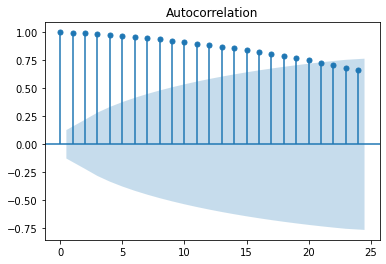

In [104]:
plot_acf(zip_60085);

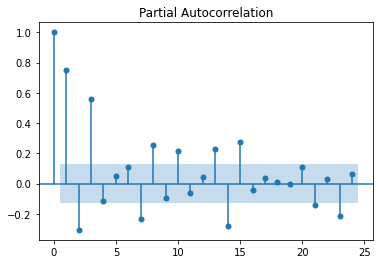

In [111]:
plot_pacf(zip_60085.diff().dropna());

Going to meet with group and what what next steps are and what models are working best for them